# Network-Enabled Camera Trap
## Group 9

This notebook processes the data uploaded by the network-enabled camera trap designed by group 9. Images are first processed to determine whether a bird is in the image. The temperature, humidity and heat index data is then extracted from images with birds. This data can be plotted and tabulated to be used for analysis.

In future developments, the processing can be updated to identify if birds are returning to the nest with food and if so, to identify what food is brought back.

The visualization and object detection code is based on the MediaPipe code example available at https://developers.google.com/mediapipe/solutions/vision/object_detector/python. It has been modified and is used to separate useful images from falsely triggered images in the Google Drive.

In [4]:
# imports & downloads

# mediapipe api
!pip install -q mediapipe==0.10.0
!wget -q -O efficientdet.tflite -q https://storage.googleapis.com/mediapipe-models/object_detector/efficientdet_lite0/int8/1/efficientdet_lite0.tflite

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 64.1 MB/s eta 0:00:00


In [9]:
import cv2
import numpy as np

MARGIN = 10  # pixels
ROW_SIZE = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
TEXT_COLOR = (0, 0, 255)  # blue


def visualize(
    image,
    detection_result
) -> np.ndarray:
  """Draws bounding boxes on the input image and return it.
  Args:
    image: The input RGB image.
    detection_result: The list of all "Detection" entities to be visualize.
  Returns:
    Image with bounding boxes.
  """
  for detection in detection_result.detections:
    # Draw bounding_box
    bbox = detection.bounding_box
    start_point = bbox.origin_x, bbox.origin_y
    end_point = bbox.origin_x + bbox.width, bbox.origin_y + bbox.height
    cv2.rectangle(image, start_point, end_point, TEXT_COLOR, 3)

    # Draw label and score
    category = detection.categories[0]
    category_name = category.category_name
    probability = round(category.score, 2)
    result_text = category_name + ' (' + str(probability) + ')'
    text_location = (MARGIN + bbox.origin_x,
                     MARGIN + ROW_SIZE + bbox.origin_y)
    cv2.putText(image, result_text, text_location, cv2.FONT_HERSHEY_PLAIN,
                FONT_SIZE, TEXT_COLOR, FONT_THICKNESS)

  return image

In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


/content/gdrive/MyDrive/ESP32-CAM/picture52_H50.00_T24.60_HIC24.27.jpg
/content/gdrive/MyDrive/ESP32-CAM/picture63_H44.00_T25.40_HIC31.27.jpg
/content/gdrive/MyDrive/ESP32-CAM/picture76_H74.00_T23.62_HIC23.27.jpg
/content/gdrive/MyDrive/ESP32-CAM/picture81_H68.00_T20.40_HIC21.27.jpg
/content/gdrive/MyDrive/ESP32-CAM/picture47_H64.00_T21.40_HIC22.27.jpg
/content/gdrive/MyDrive/ESP32-CAM/picture56_H58.00_T24.40_HIC24.37.jpg
/content/gdrive/MyDrive/ESP32-CAM/picture65_H69.00_T23.42_HIC21.35.jpg


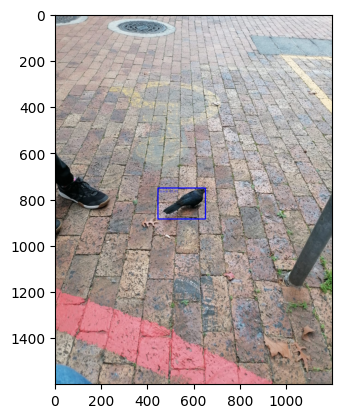

In [10]:
# Bird detection
# STEP 1: Import the necessary modules.
import numpy as np
import matplotlib.pyplot as plt
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2
import os

directory_path = '/content/gdrive/MyDrive/ESP32-CAM'
directory_files = os.listdir(directory_path)
birdfiles = []
data = []
imgs = []

# STEP 2: Create an ObjectDetector object.
base_options = python.BaseOptions(model_asset_path='efficientdet.tflite')
options = vision.ObjectDetectorOptions(base_options=base_options,
                                       score_threshold=0.5)
detector = vision.ObjectDetector.create_from_options(options)

for file in directory_files:
  fname = directory_path + "/" + file
  # STEP 3: Load the input image.
  image = mp.Image.create_from_file(fname)

  # STEP 4: Detect objects in the input image.
  detection_result = detector.detect(image)
  if (len(detection_result.detections) > 0):
    if(((((detection_result.detections[0]).categories)[0]).category_name) == 'bird'):
      birdfiles.append(fname)

      # STEP 5: Process the detection result. In this case, visualize it.
      image_copy = np.copy(image.numpy_view())
      annotated_image = visualize(image_copy, detection_result)
      imgs.append(annotated_image)
      plt.imshow(annotated_image)
for i in birdfiles:
  print(i)

/content/gdrive/MyDrive/ESP32-CAM/picture52_H50.00_T24.60_HIC24.27.jpg
/content/gdrive/MyDrive/ESP32-CAM/picture63_H44.00_T25.40_HIC31.27.jpg
/content/gdrive/MyDrive/ESP32-CAM/picture76_H74.00_T23.62_HIC23.27.jpg
/content/gdrive/MyDrive/ESP32-CAM/picture81_H68.00_T20.40_HIC21.27.jpg
/content/gdrive/MyDrive/ESP32-CAM/picture47_H64.00_T21.40_HIC22.27.jpg
/content/gdrive/MyDrive/ESP32-CAM/picture56_H58.00_T24.40_HIC24.37.jpg
/content/gdrive/MyDrive/ESP32-CAM/picture65_H69.00_T23.42_HIC21.35.jpg


<Axes: xlabel='id', ylabel='heat index'>

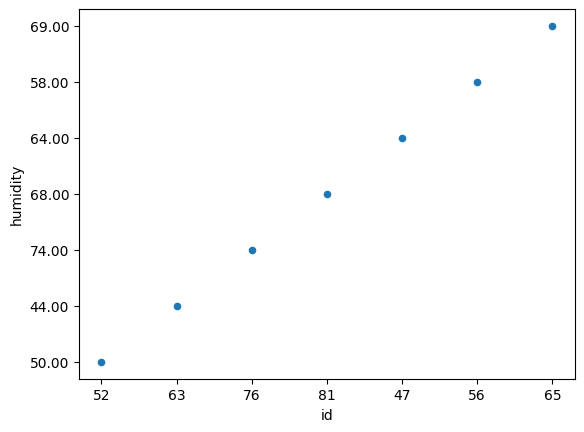

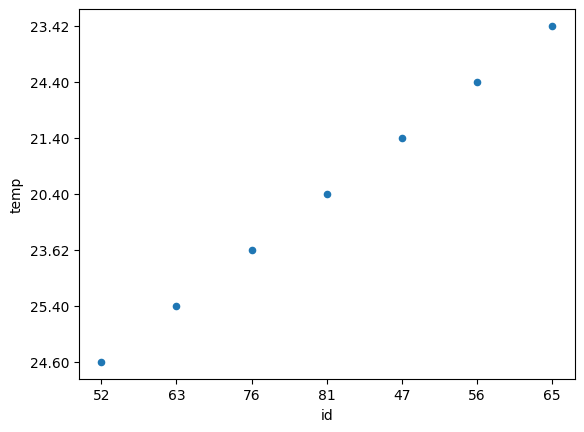

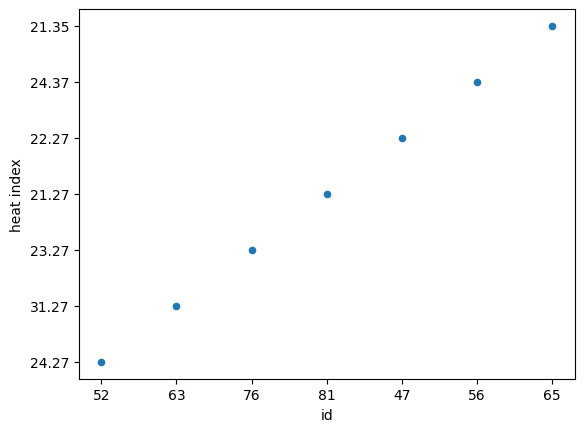

In [ ]:
import pandas as pd
import os

directory_path = '/content/gdrive/MyDrive/ESP32-CAM'
directory_files = os.listdir(directory_path)
names = []
data = []

for file in birdfiles:
  # path = os.path.join(directory_path, file)
  # df_file = pd.read_csv(path, encoding = 'ISO-8859-1')
  print(file)
  names.append(file)
  temp = file.split("_")
  temp[0] = (temp[0].split("picture"))[1]
  temp[1] = (temp[1].split("H"))[1]
  temp[2] = (temp[2].split("T"))[1]
  temp[3]= (((temp[3].split("HIC"))[1]).split(".jpg"))[0]
  data.append(temp)
df = pd.DataFrame(data, columns=['id', 'humidity', 'temp', 'heat index'])

df.plot(x='id', y='humidity', kind='scatter')	
df.plot(x='id', y='temp', kind='scatter')	
df.plot(x='id', y='heat index', kind='scatter')	